In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
iris = load_iris() 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris_df['species'] = iris.target 
iris_df.to_csv('iris_dataset.csv', index=False) 

In [6]:
X = iris.data

In [7]:
y = iris.target

In [8]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [9]:
agglo_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [10]:
clusters = agglo_clustering.fit_predict(X_scaled)

In [11]:
predicted_clusters_df = pd.DataFrame({ 
    'Sample Index': np.arange(len(clusters)),  # Index of each sample 
    'Predicted Cluster': clusters                # Predicted cluster labels 
})

In [12]:
predicted_clusters_df.to_csv('predicted_clusters.csv', index=False)

In [13]:
linked = linkage(X_scaled, method='single') 

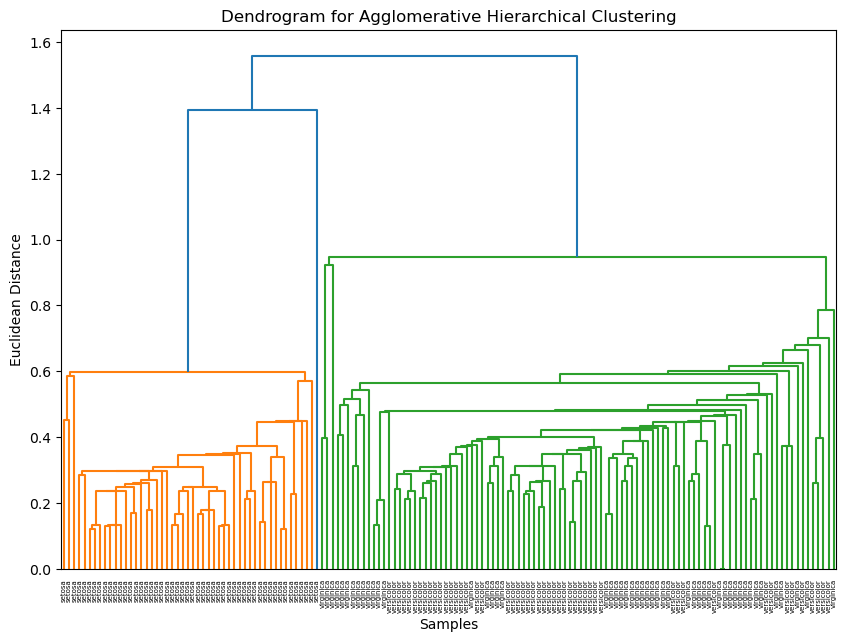

In [14]:
plt.figure(figsize=(10, 7)) 
dendrogram(linked, 
           orientation='top', 
           labels=iris.target_names[y], 
           distance_sort='descending', 
           show_leaf_counts=True) 
plt.title('Dendrogram for Agglomerative Hierarchical Clustering') 
plt.xlabel('Samples') 
plt.ylabel('Euclidean Distance')
plt.savefig('dendrogram.png')

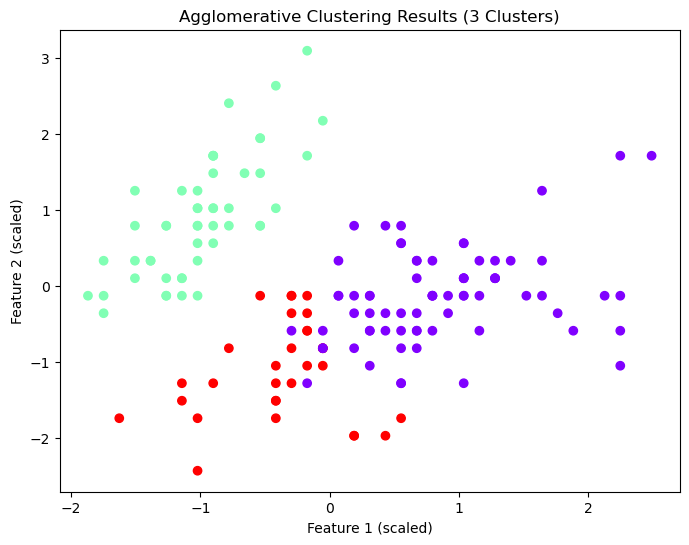

In [15]:
plt.figure(figsize=(8, 6)) 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow') 
plt.title('Agglomerative Clustering Results (3 Clusters)') 
plt.xlabel('Feature 1 (scaled)') 
plt.ylabel('Feature 2 (scaled)') 
plt.savefig('agglomerative.png')